In [3]:
import numpy as np
import os
results = dict()

# Assuming Mathematica exports are in the directory
# ./tty_csvs
for fn in os.listdir('./tty_csvs'):
    if not fn.endswith('csv'):
        continue
    shell = fn[2:4]

    # Load the sort-of-csv files with the form factor data
    # These are Mathematica exports from TTY's Xe.mx file
    # (.mx is a proprietary Mathematica format python can't load directly)
    with open('./tty_csvs/' + fn, mode='r') as f:
        for i, line in enumerate(list(f.readlines())):
            for x in '{"':
                line = line.replace(x, '')
            line = line.replace('*^', 'e')
            line = line.replace(',', ' ')
            if i == 0:
                # First line contains the argument ranges
                # Mathematica [[1, 2, 1]], [[1, 2, 2]] = python [0,1,0], [0,1,1] = lnqmin, lnqmax
                # Mathematica [[1, 1, 1]], [[1, 1, 2]] = python [0,0,0], [0,0,1] = lnkmin, lnkmax
                line = line.replace('}','')
                lnkmin, lnkmax, lnqmin, lnqmax = [float(x) for x in line.split()]
            elif i == 1:
                # Second line contains the form factor data
                result = []
                for blob in line.split('}'):
                    stuff = [float(x) for x in blob.split()]
                    if len(stuff):
                        result.append(stuff)
            else:
                raise ValueError("Another line??")

    result = np.array(result)

    # Coordinates of form factor data
    lnks = np.linspace(lnkmin, lnkmax, result.shape[0])
    lnqs = np.linspace(lnqmin, lnqmax, result.shape[1])

    results[shell] = dict(lnks=lnks, lnqs=lnqs, ffsquared=result)

import pickle
with open('dme_ionization_ff_argon.pkl', mode='wb') as f:
    pickle.dump(results, f)

ValueError: Another line??

Ar3sFullAlt.csv 3s
Ar3p12FullAlt.csv 3p
Ar3p32FullAlt.csv 3p


In [1]:
def get_file_data(fn):
    results = []
    ranges = []
    with open('./tty_csvs/' + fn, mode='r') as f:
        
        for i, line in enumerate(list(f.readlines())):
            if len(line) < 25:
                line = line.replace('\"','')
                line = line.replace('{','')
                line = line.replace('}','')
                line = line.replace(',',' ')
                lnkmin, lnkmax, lnqmin, lnqmax = [float(x) for x in line.split()]
                ranges.append([lnkmin,lnkmax,lnqmin,lnqmax])

                # print(lnkmin,lnkmax,lnqmin,lnqmax)
            else:
                line = line.replace('*^', 'e')
                line = line.replace('{', '')
                line = line.replace('\"', '')

                line = line.replace(',', '')

                result = []
                for blob in line.split('}'):
                    # print(blob)
                    stuff = [float(x) for x in blob.split()]
                    if len(stuff):
                        result.append(stuff)
                # print(result)
                result = np.array(result)
                results.append(result)
    return ranges,results

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Assuming Mathematica exports are in the directory
# ./tty_csvs


    # # Load the sort-of-csv files with the form factor data
    # # These are Mathematica exports from TTY's Xe.mx file
    # # (.mx is a proprietary Mathematica format python can't load directly)
fn = 'Ar3p12FullAlt.csv'

results = dict()
for fn in os.listdir('./tty_csvs'):
    if not fn.endswith('csv'):
        continue
    shell = fn[2:6]
    ranges,grids = get_file_data(fn)
    if len(grids) == 3:

        first_bounds = ranges[0]
        lnkmin1 = first_bounds[0]
        lnkmax1 = first_bounds[1]
        first_grid = grids[0]
        lnks1 = np.linspace(lnkmin1, lnkmax1, first_grid.shape[0])

        second_bounds = ranges[1]
        lnkmin2 = second_bounds[0]
        lnkmax2 = second_bounds[1]
        second_grid = grids[1]
        lnks2 = np.linspace(lnkmin2, lnkmax2, second_grid.shape[0])


        third_bounds = ranges[2]
        lnkmin3 = third_bounds[0]
        lnkmax3 = third_bounds[1]
        third_grid = grids[2]
        lnks3 = np.linspace(lnkmin3, lnkmax3, third_grid.shape[0])

        crop_indices = np.where(lnks1 < lnks2[0])[0]
        lnks1_cropped = lnks1[crop_indices]
        first_grid_cropped = first_grid[crop_indices,:]

        lnks = np.concatenate((lnks1_cropped,lnks2,lnks3))
        #seems to be a duplicate element


        whole_grid = np.vstack((first_grid_cropped,second_grid,third_grid))
        # lnks = np.concatenate((lnks2,lnks3))
        # whole_grid = np.vstack((second_grid,third_grid))



        # lnks = np.concatenate((lnks1,lnks2,lnks3))
        # lnks = np.concatenate((lnks2,lnks3))

        #seems to be a duplicate element
        
        # whole_grid = np.concatenate((first_grid,second_grid,third_grid))

        # whole_grid = np.concatenate((second_grid,third_grid))
        

        # sort_indices = np.argsort(lnks)
        # whole_grid = whole_grid[sort_indices]
        # lnks = lnks[sort_indices]
        # lnks = lnks[:-1]
        # whole_grid = whole_grid[:-1,:]

        lnqmin = first_bounds[2]
        lnqmax = first_bounds[3]
        lnqs = np.linspace(lnqmin, lnqmax, whole_grid.shape[1])



    elif len(grids) == 1:
        shell = shell[:-2]
        #normal way to do it should be fine
        bounds = ranges[0]
        lnkmin = bounds[0]
        lnkmax = bounds[1]

        lnqmin = bounds[2]
        lnqmax = bounds[3]
        grid = grids[0]
        lnks = np.linspace(lnkmin, lnkmax, grid.shape[0])
        lnqs = np.linspace(lnqmin, lnqmax, grid.shape[1])
        whole_grid = grid
    print(fn,shell)
    print('lnks',lnks.shape,lnks)
    print('lnqs',lnqs.shape,lnqs)

    print(whole_grid.shape)
    results[shell] = dict(lnks=lnks, lnqs=lnqs, ffsquared=whole_grid)
    





import pickle
with open('data/dme/dme_ionization_ff_argon.pkl', mode='wb') as f:
    pickle.dump(results, f)



Ar3sFullAlt.csv 3s
lnks (43,) [-2.4000000e+00 -2.3000000e+00 -2.2000000e+00 -2.1000000e+00
 -2.0000000e+00 -1.9000000e+00 -1.8000000e+00 -1.7000000e+00
 -1.6000000e+00 -1.5000000e+00 -1.4000000e+00 -1.3000000e+00
 -1.2000000e+00 -1.1000000e+00 -1.0000000e+00 -9.0000000e-01
 -8.0000000e-01 -7.0000000e-01 -6.0000000e-01 -5.0000000e-01
 -4.0000000e-01 -3.0000000e-01 -2.0000000e-01 -1.0000000e-01
  4.4408921e-16  1.0000000e-01  2.0000000e-01  3.0000000e-01
  4.0000000e-01  5.0000000e-01  6.0000000e-01  7.0000000e-01
  8.0000000e-01  9.0000000e-01  1.0000000e+00  1.1000000e+00
  1.2000000e+00  1.3000000e+00  1.4000000e+00  1.5000000e+00
  1.6000000e+00  1.7000000e+00  1.8000000e+00]
lnqs (51,) [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7
  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1
  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4. ]
(43, 51)
Ar3p12FullAlt.csv 3p12
lnks (34,)

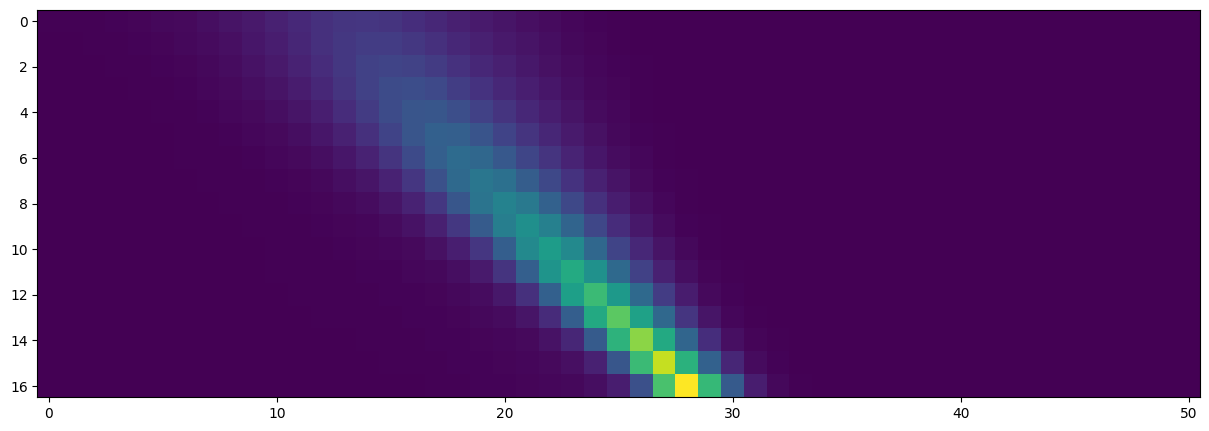

In [57]:
file = '../tty_csvs/Ar3p32FullAlt.csv'
ranges,grids = get_file_data(file)
first_bounds = ranges[0]
lnkmin1 = first_bounds[0]
lnkmax1 = first_bounds[1]
first_grid = grids[0]
lnks1 = np.linspace(lnkmin1, lnkmax1, first_grid.shape[0])

second_bounds = ranges[1]
lnkmin2 = second_bounds[0]
lnkmax2 = second_bounds[1]
second_grid = grids[1]
lnks2 = np.linspace(lnkmin2, lnkmax2, second_grid.shape[0])


third_bounds = ranges[2]
lnkmin3 = third_bounds[0]
lnkmax3 = third_bounds[1]
third_grid = grids[2]
lnks3 = np.linspace(lnkmin3, lnkmax3, third_grid.shape[0])
lnqmin = first_bounds[2]
lnqmax = first_bounds[3]
lnqs = np.linspace(lnqmin, lnqmax, whole_grid.shape[1])


fig,ax = plt.subplots(figsize=(15,10))
ax.imshow(first_grid)

ax.imshow(second_grid)
ax.imshow(third_grid)

[-2.4        -2.07692308 -1.75384615 -1.43076923 -1.10769231] (5, 51)
(34, 51) (34,)


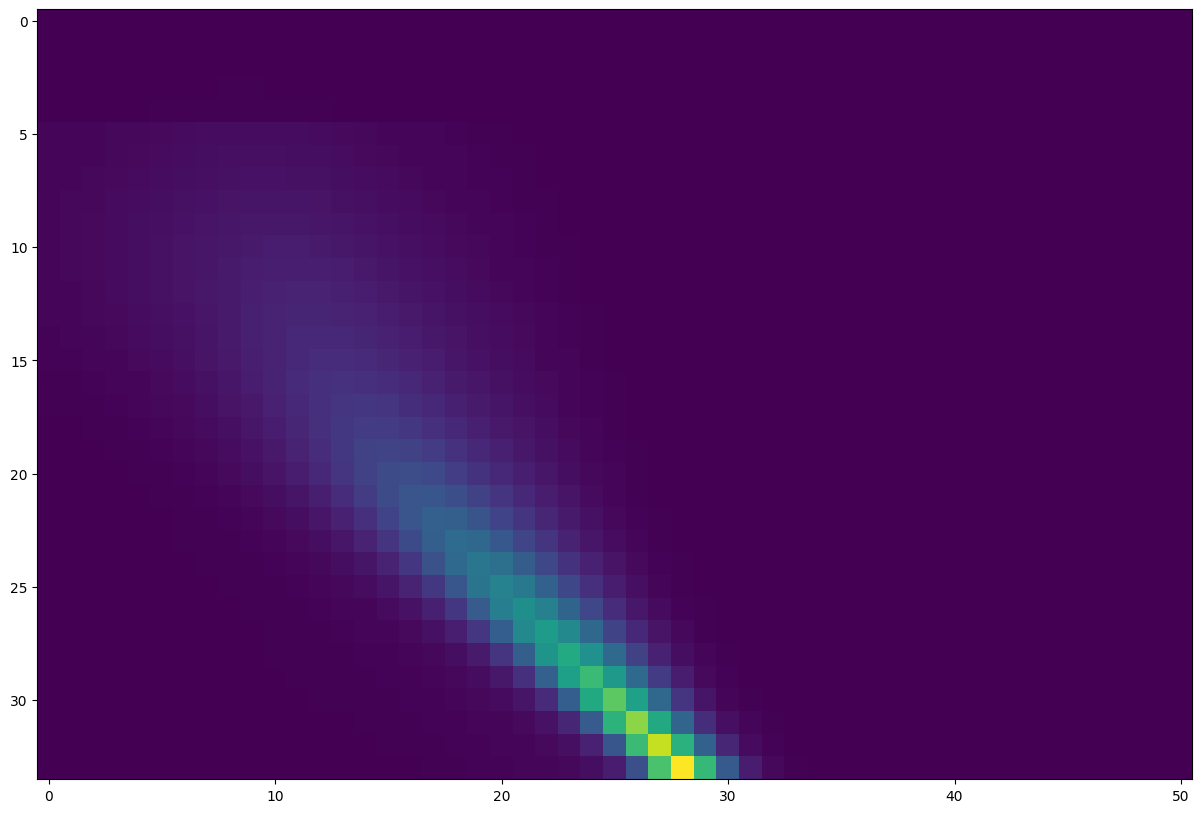

In [71]:
crop_indices = np.where(lnks1 < lnks2[0])[0]
lnks1_cropped = lnks1[crop_indices]
first_grid_cropped = first_grid[crop_indices,:]

print(lnks1_cropped,first_grid_cropped.shape)
lnks = np.concatenate((lnks1_cropped,lnks2,lnks3))
#seems to be a duplicate element


whole_grid = np.concatenate((first_grid,second_grid,third_grid))
whole_grid = np.vstack((first_grid_cropped,second_grid,third_grid))

print(whole_grid.shape,lnks.shape)

# lnks = lnks[sort_indices]
# whole_grid = whole_grid[sort_indices]
# lnks = lnks[:-1]
# whole_grid = whole_grid[:-1,:]
fig,ax = plt.subplots(figsize=(15,10))
ax.imshow(whole_grid)

plt.show()


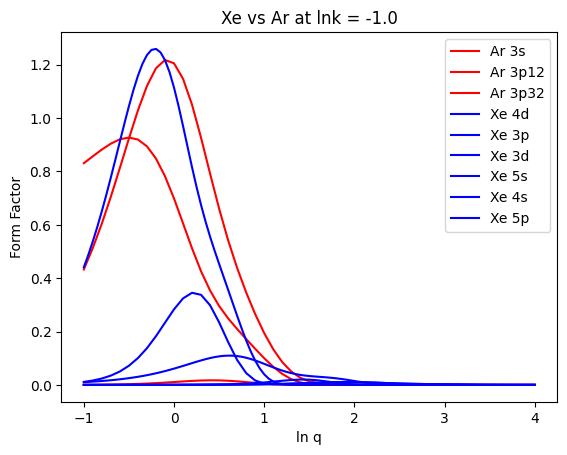

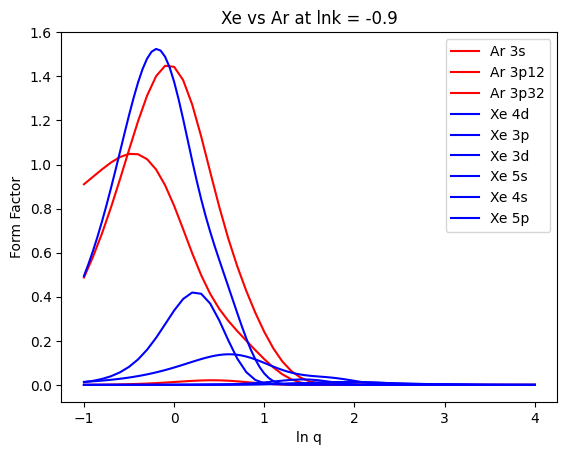

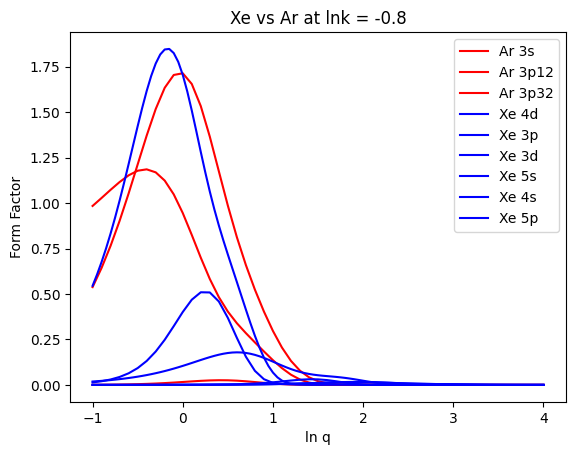

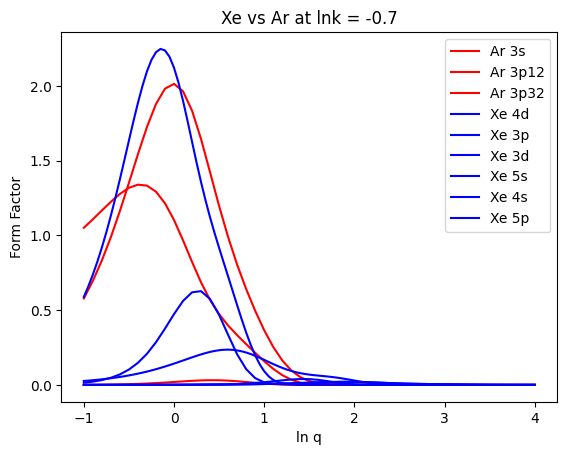

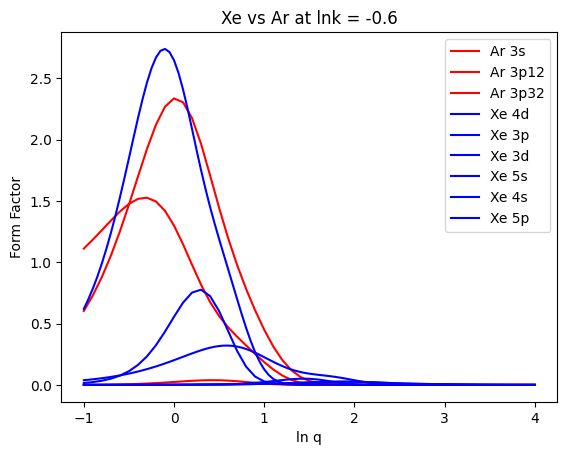

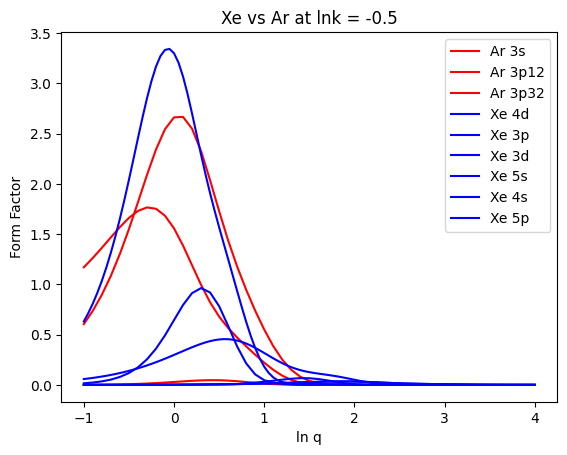

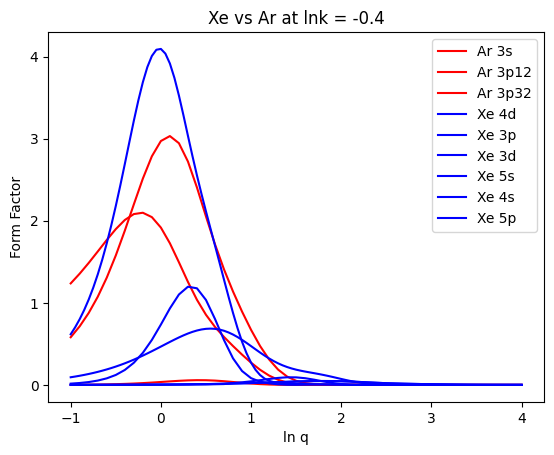

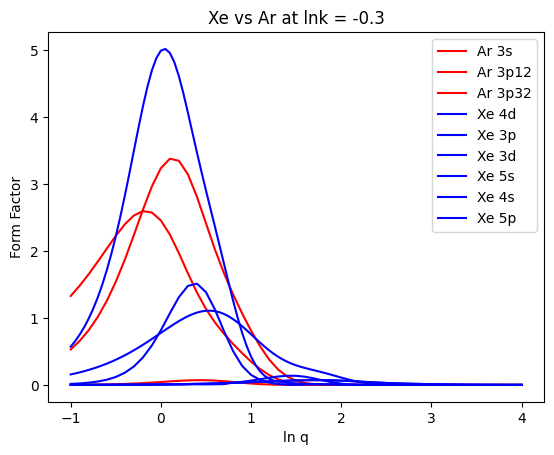

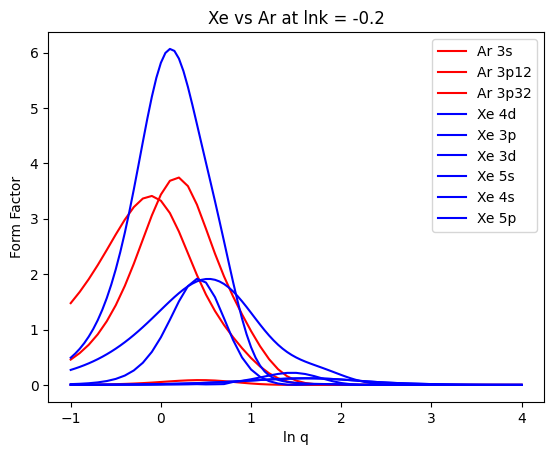

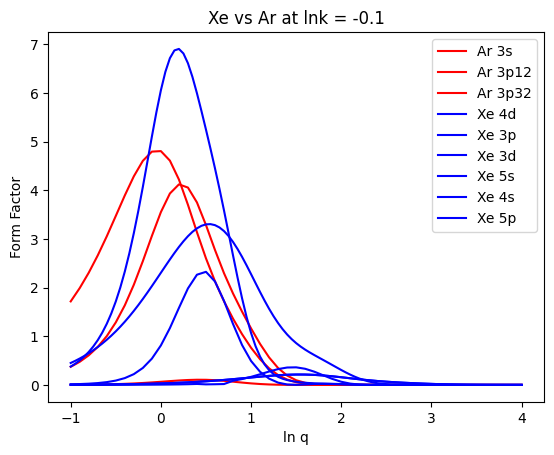

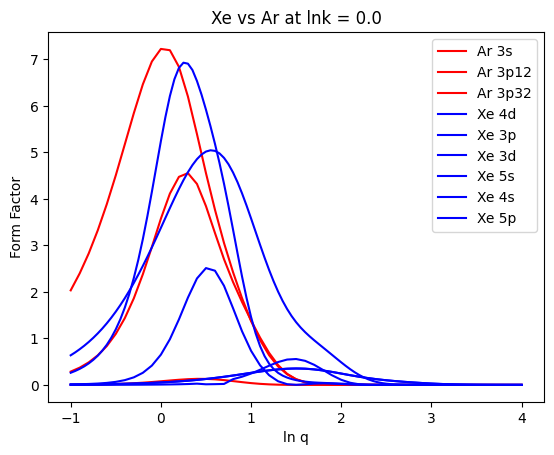

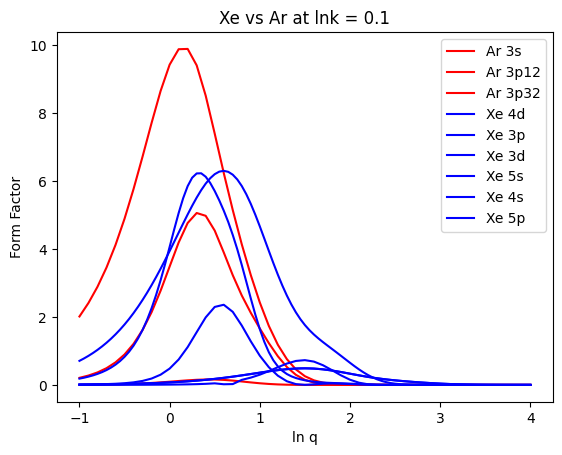

In [30]:
with open('dme_ionization_ff_argon.pkl', mode='rb') as f:
    argon_shell_data = pickle.load(f)

with open('dme_ionization_ff.pkl', mode='rb') as f:
    shell_data = pickle.load(f)
from scipy.interpolate import RegularGridInterpolator, interp1d

# for _shell_, _sd_ in argon_shell_data.items():
#     _sd_['log10ffsquared_itp'] = RegularGridInterpolator(
#         (_sd_['lnks'], _sd_['lnqs']),
#         np.log10(_sd_['ffsquared']),
#         bounds_error=False, fill_value=-float('inf'),)
    
import matplotlib.pyplot as plt

for test_index in range(12):
    # ax.imshow(argon_shell_data['3s']['ffsquared'])
    # ax.imshow(argon_shell_data['3p12']['ffsquared'])
    for shell in list(argon_shell_data.keys()):
        ff_squared_argon = argon_shell_data[shell]['ffsquared']
        lnks_argon = argon_shell_data[shell]['lnks']
        lnks_argon = np.round(lnks_argon,3)
        lnqs_argon = argon_shell_data[shell]['lnqs']
        lnk_test = lnks_argon[test_index]

        plt.plot(lnqs_argon,ff_squared_argon[test_index,:],label = f'Ar {shell}',color='red')




    for shell in list(shell_data.keys()):
        ff_squared_xenon = shell_data[shell]['ffsquared']
        lnks_xenon = shell_data[shell]['lnks']
        lnqs_xenon = shell_data[shell]['lnqs']
        lnks_xenon = np.round(lnks_xenon,3)

        try:
            xe_i = np.where(lnks_xenon == lnk_test)[0][0]
        except IndexError:
            continue
        plt.plot(lnqs_xenon,ff_squared_xenon[xe_i,:],label = f'Xe {shell}',color='blue')












    plt.ylabel('Form Factor')
    plt.xlabel('ln q')
    plt.title(f'Xe vs Ar at lnk = {lnk_test}')
    plt.legend()
    plt.show()
